# H&M Personalized Fashion Recommendations
https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/data

1. Изучение и обработка

2. Построение модели (в разработке)

In [10]:
import pandas as pd
import numpy as np
from pathlib import Path

import datetime 
import time

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import multiprocessing as mp
from functools import partial
from multiprocessing import Pool

Цветовая схема:


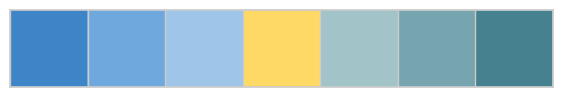

In [11]:
#whitegrid,darkgrid,white,ticks,white
sns.set_theme(style="whitegrid")#, font_scale=2
plt.rcParams["figure.figsize"] = (20,10)
my_colors = ['#3d85c6', '#6fa8dc', '#9fc5e8', '#ffd966', '#a2c4c9', '#76a5af', '#45818e']
#pal = sns.cubehelix_palette(10, rot=-.25, light=.7)

print("Цветовая схема:")
sns.palplot(sns.color_palette(my_colors))
plt.show()



In [12]:
DATA_DIR = Path("D:/Документы/Python/Kaggle/H&M Personalized Fashion Recommendations")

In [13]:
articles = pd.read_csv(DATA_DIR/"articles.csv")
customers = pd.read_csv(DATA_DIR/"customers.csv")
transactions = pd.read_csv(DATA_DIR/"transactions_train.csv")

# Изучение и обработка

In [87]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [82]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [14]:
articles[['article_id', 'product_code', 'product_type_no', 'garment_group_no', 'graphical_appearance_no', 'colour_group_code', 'section_no', 'index_group_no']] =articles[['article_id', 'product_code', 'product_type_no', 'garment_group_no', 'graphical_appearance_no', 'colour_group_code', 'section_no', 'index_group_no']].astype('int32')

In [6]:
articles = articles.drop_duplicates(keep="first")

Таблица содержит все товары H&M с такими подробностями, как тип товара, цвет, группа товара и другие характеристики.

## Articles:

article_id : уникальный идентификатор каждой статьи.

product_code, prod_name : уникальный идентификатор каждого продукта и его название (не одно и то же).

product_type, product_type_name : Группа product_code и ее название.

graphical_appearance_no, graphical_appearance_name : Группа графики и ее имя

colour_group_code, colour_group_name : Группа цвета и ее название

perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name: добавленная информация о цвете

department_no, department_name: Уникальный идентификатор каждого отдела и его имя.

index_code, index_name: уникальный идентификатор каждого индекса и его имя.

index_group_no, index_group_name: группа индексов и ее имя

section_no, section_name: Уникальный идентификатор каждого раздела и его имя

garment_group_no, garment_group_name: Уникальный идентификатор каждой одежды и ее название.

detail_desc: Детали

In [46]:
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [ ]:
Таблица с количеством уникальных значений в столбцах:

In [15]:
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articles[col].nunique()
        print(f'n of unique {col}: {un_n}')

n of unique prod_name: 45875
n of unique product_type_name: 131
n of unique product_group_name: 19
n of unique graphical_appearance_name: 30
n of unique colour_group_name: 50
n of unique perceived_colour_value_name: 8
n of unique perceived_colour_master_name: 20
n of unique department_name: 250
n of unique index_name: 10
n of unique index_group_name: 5
n of unique section_name: 56
n of unique garment_group_name: 21
n of unique detail_desc: 43404


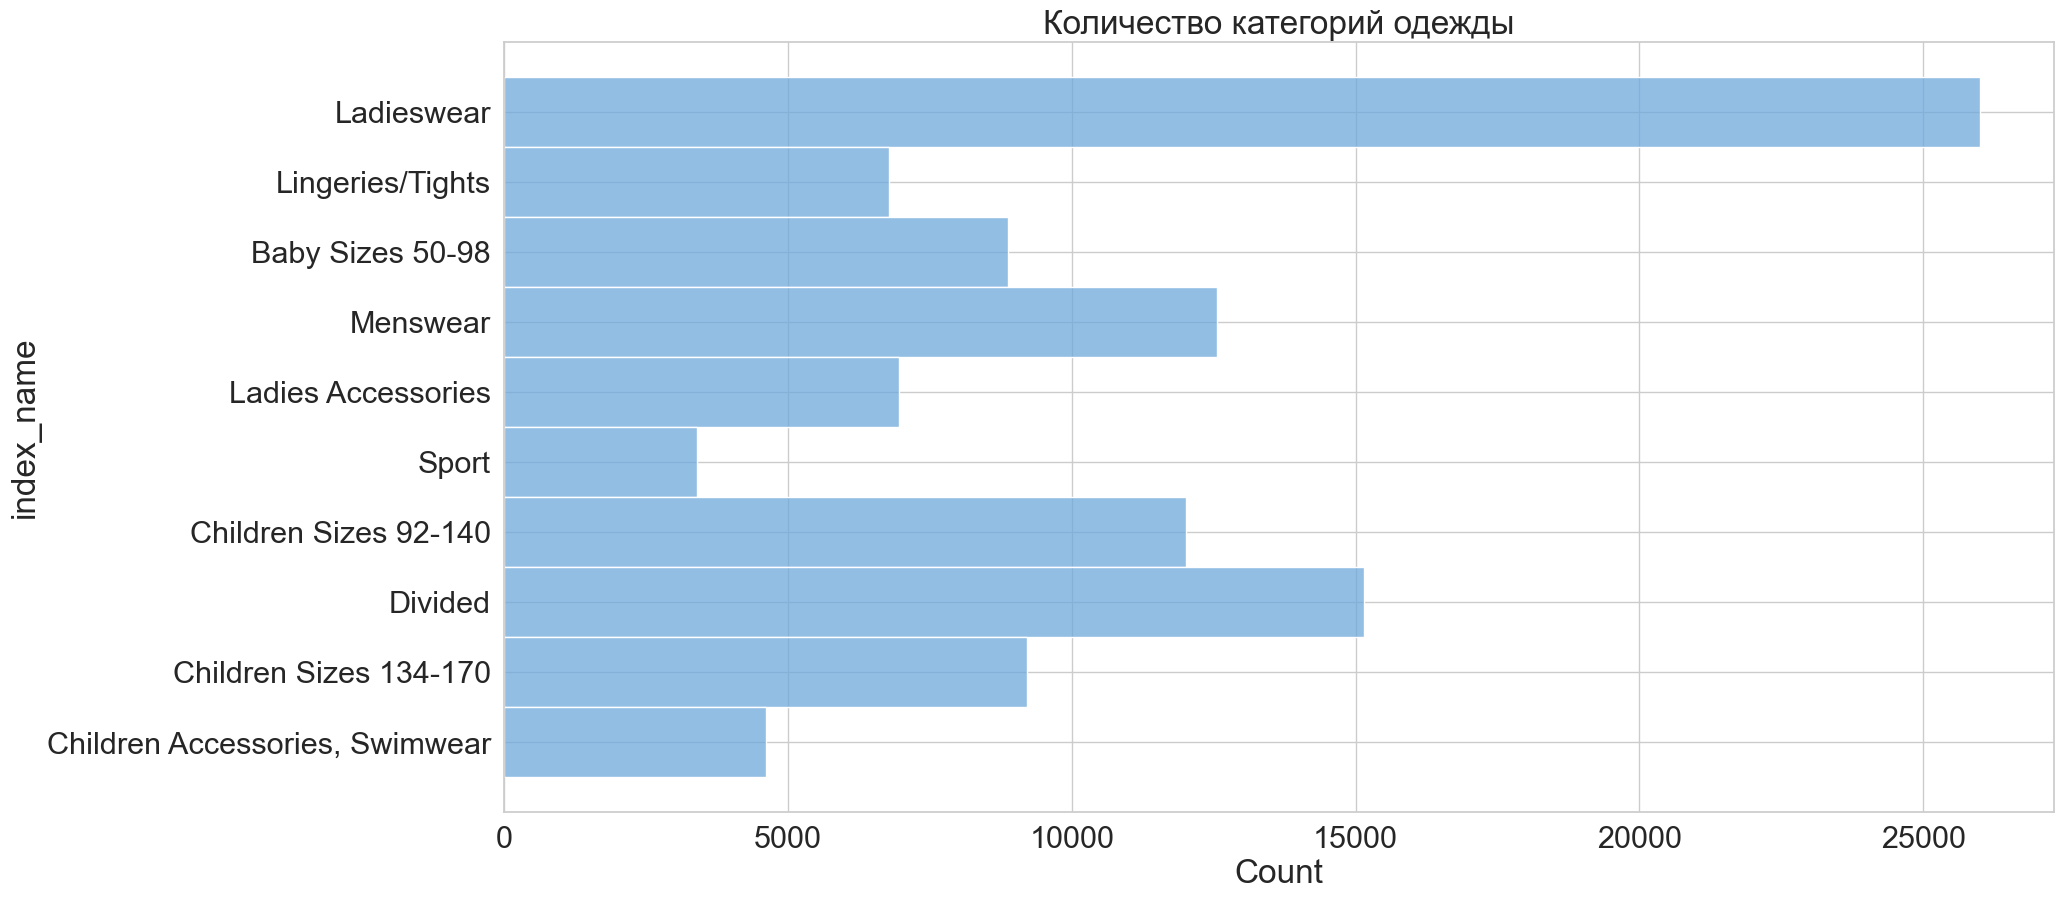

In [7]:
ax = sns.histplot(data=articles, y='index_name', color=my_colors[1])
plt.title('Количество категорий одежды', fontsize=24)
plt.show()

Женская одежда составляет значительную часть, cпортивная одежда имеет наименьшую долю.

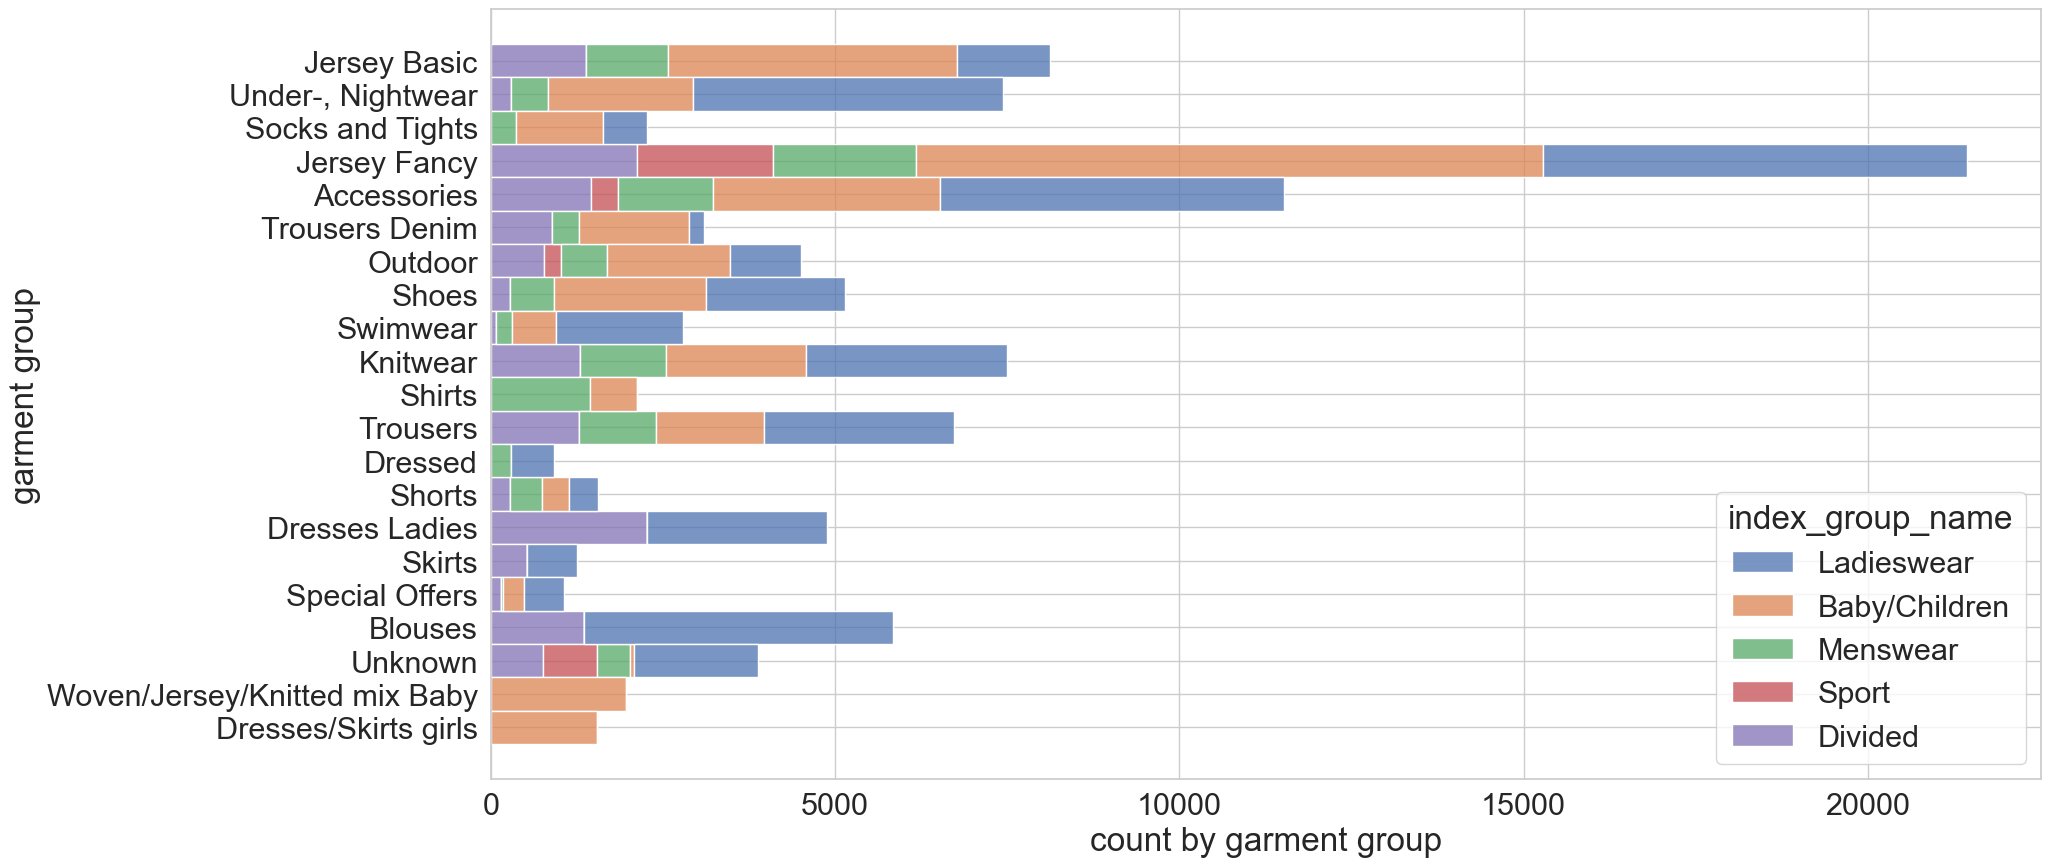

In [39]:
ax = sns.histplot(data=articles, y='garment_group_name', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

Предметы одежды, сгруппированные по индексу: Трикотаж — наиболее часто встречающийся материал, особенно для женщин и детей. Далее идут аксессуары, много разных аксессуаров по невысокой цене.

In [40]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

Женская одежда и Дети/Малыши имеют подгруппы.

In [16]:
customers = customers.drop_duplicates(keep="first")

In [11]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 83.7+ MB


In [17]:
customers[['FN', 'Active', 'age']] = customers[['FN', 'Active', 'age']].astype('float32')

## Customers:

customer_id : Уникальный идентификатор каждого клиента

FN : 1 или пропущен

Active : 1 или пропущен

club_member_status : Статус в клубе

fashion_news_frequency : Как часто H&M может отправлять новости покупателю

age : Возраст

postal_code : Почтовый индекс клиента

In [76]:
customers.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [9]:
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


In [10]:
custfin= pd.DataFrame(customers, columns = ['customer_id','age'])
total_tran = pd.merge(custfin,transactions, how='right', on='customer_id')
total_tran["age"].fillna(value=0,inplace=True)
total_tran["age"]=total_tran["age"].apply(int)

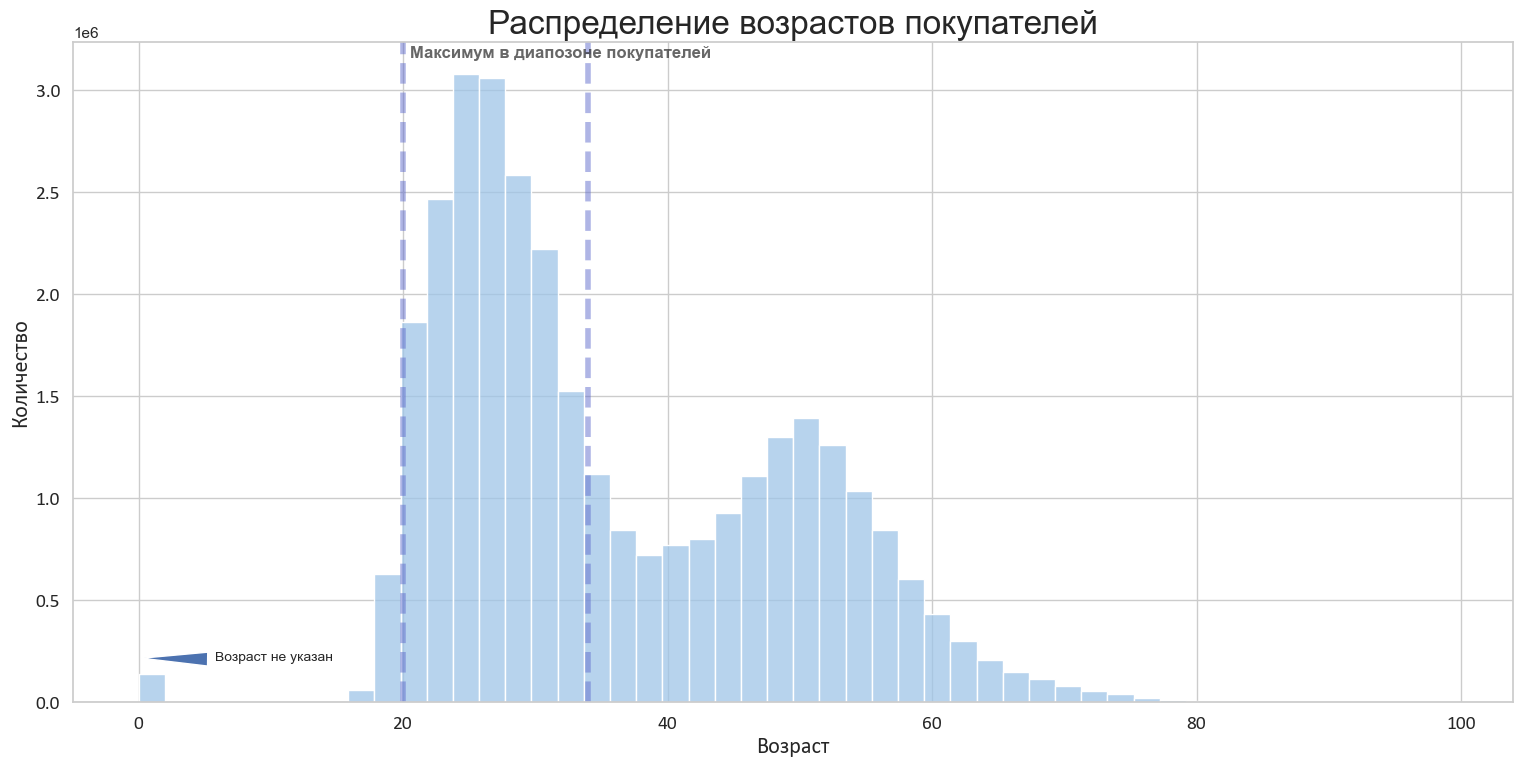

In [112]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax = sns.histplot(data=total_tran, x='age', bins=50,color=my_colors[2], )

ax.annotate('Возраст не указан',
            xy=(0,216100),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=10, va="center",
            bbox=dict(boxstyle="round",facecolor='white'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            relpos=(0.1, 0.4)))

ax.axvline(x=20,alpha=0.5,color=my_colors[0],linewidth=4,linestyle='--')
ax.axvline(x=34,alpha=0.5,color=my_colors[0],linewidth=4,linestyle='--')
ax.text(x=20.5, y=3161000, s='Максимум в диапозоне покупателей', alpha=0.7,fontweight = 'bold', fontsize = 12)
ttl = ax.set_title('Распределение возрастов покупателей', fontsize=24)
ttl.set_position([.5, 1.02])
ax.set_ylabel('Количество', fontsize=16, **hfont)
ax.set_xlabel('Возраст', fontsize=16, **hfont)
plt.xticks(**hfont)
plt.yticks(**hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

#### Распределение показывает, что максимальный диапазон покупателей составляет от 20 до 35 лет. Возраст некоторых покупателей не указан.

In [15]:
for col in customers.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = customers[col].nunique()
        print(f'n of unique {col}: {un_n}')

n of unique FN: 1
n of unique Active: 1
n of unique club_member_status: 3
n of unique fashion_news_frequency: 4
n of unique age: 84


In [106]:
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

#### есть три типа для НЕТ ДАННЫХ, в описании не было информации по этому поводу. Объединю эти значения.

In [16]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = np.NaN
customers['fashion_news_frequency'].unique()

array([nan, 'Regularly', 'Monthly'], dtype=object)

In [17]:
customers['fashion_news_frequency'].value_counts(dropna=False)

NaN          893722
Regularly    477416
Monthly         842
Name: fashion_news_frequency, dtype: int64

## Transactions:

t_dat : Дата

customer_id : Уникальный идентификатор каждого клиента

article_id : Уникальный идентификатор каждого артикула

price : Цена покупки

sales_channel_id : 1 или 2

In [119]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [11]:
pd.set_option('display.float_format', '{:.4f}'.format)
transactions.describe()['price']

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

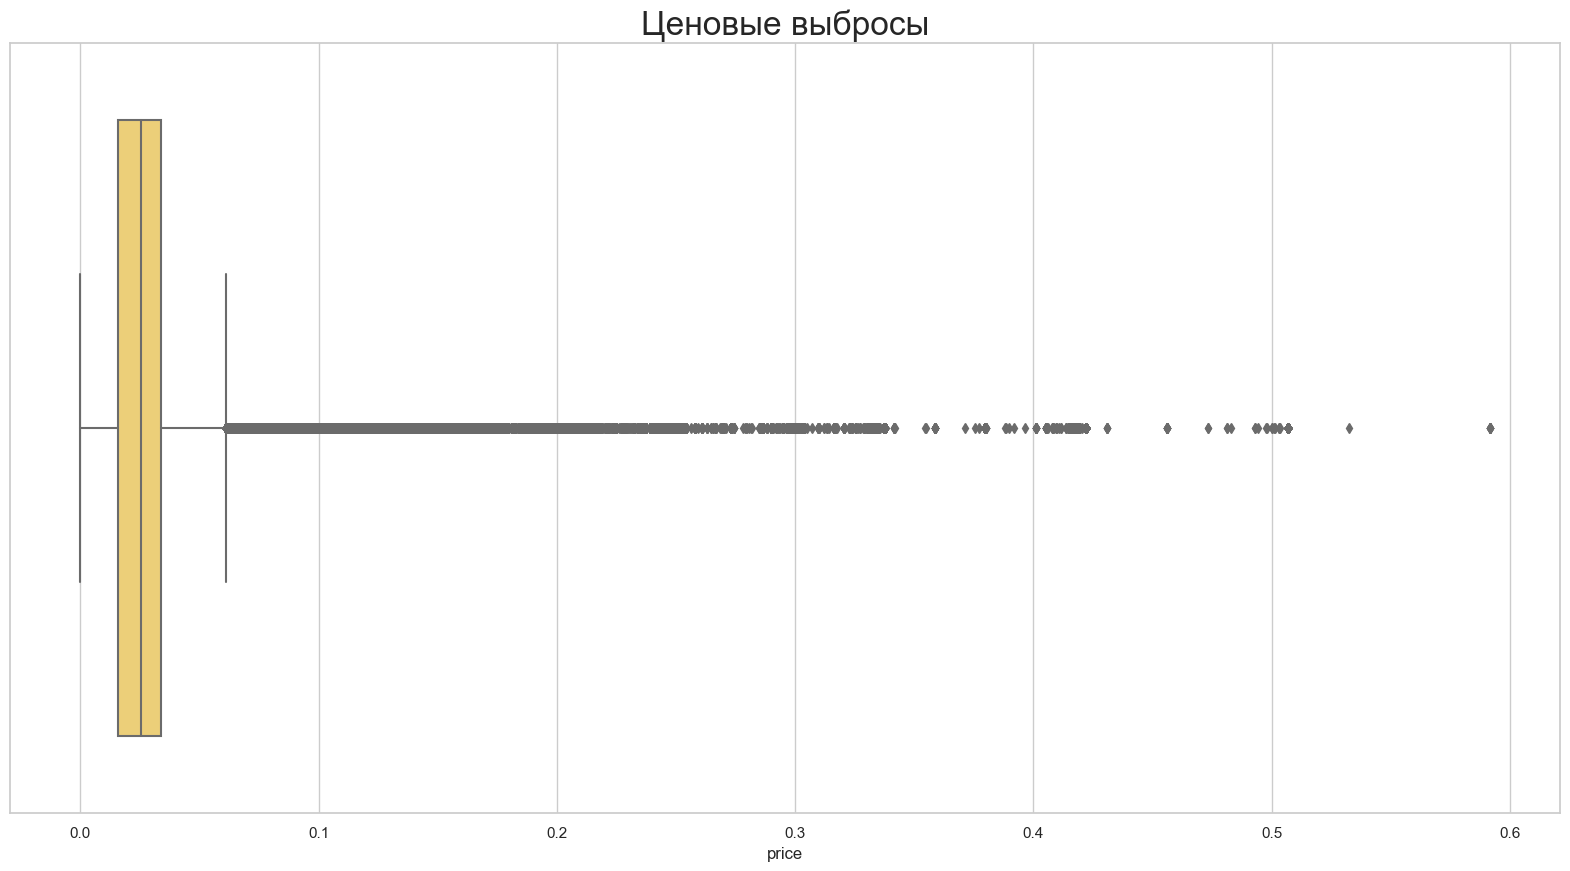

In [18]:
ax = sns.boxplot(data=transactions, x='price', color=my_colors[3])
plt.title('Ценовые выбросы', fontsize=24) 
plt.show()

#### Лучше смотреть по категориям

In [20]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]

In [21]:
articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']] \
.merge(articles_for_merge, on='article_id', how='left')

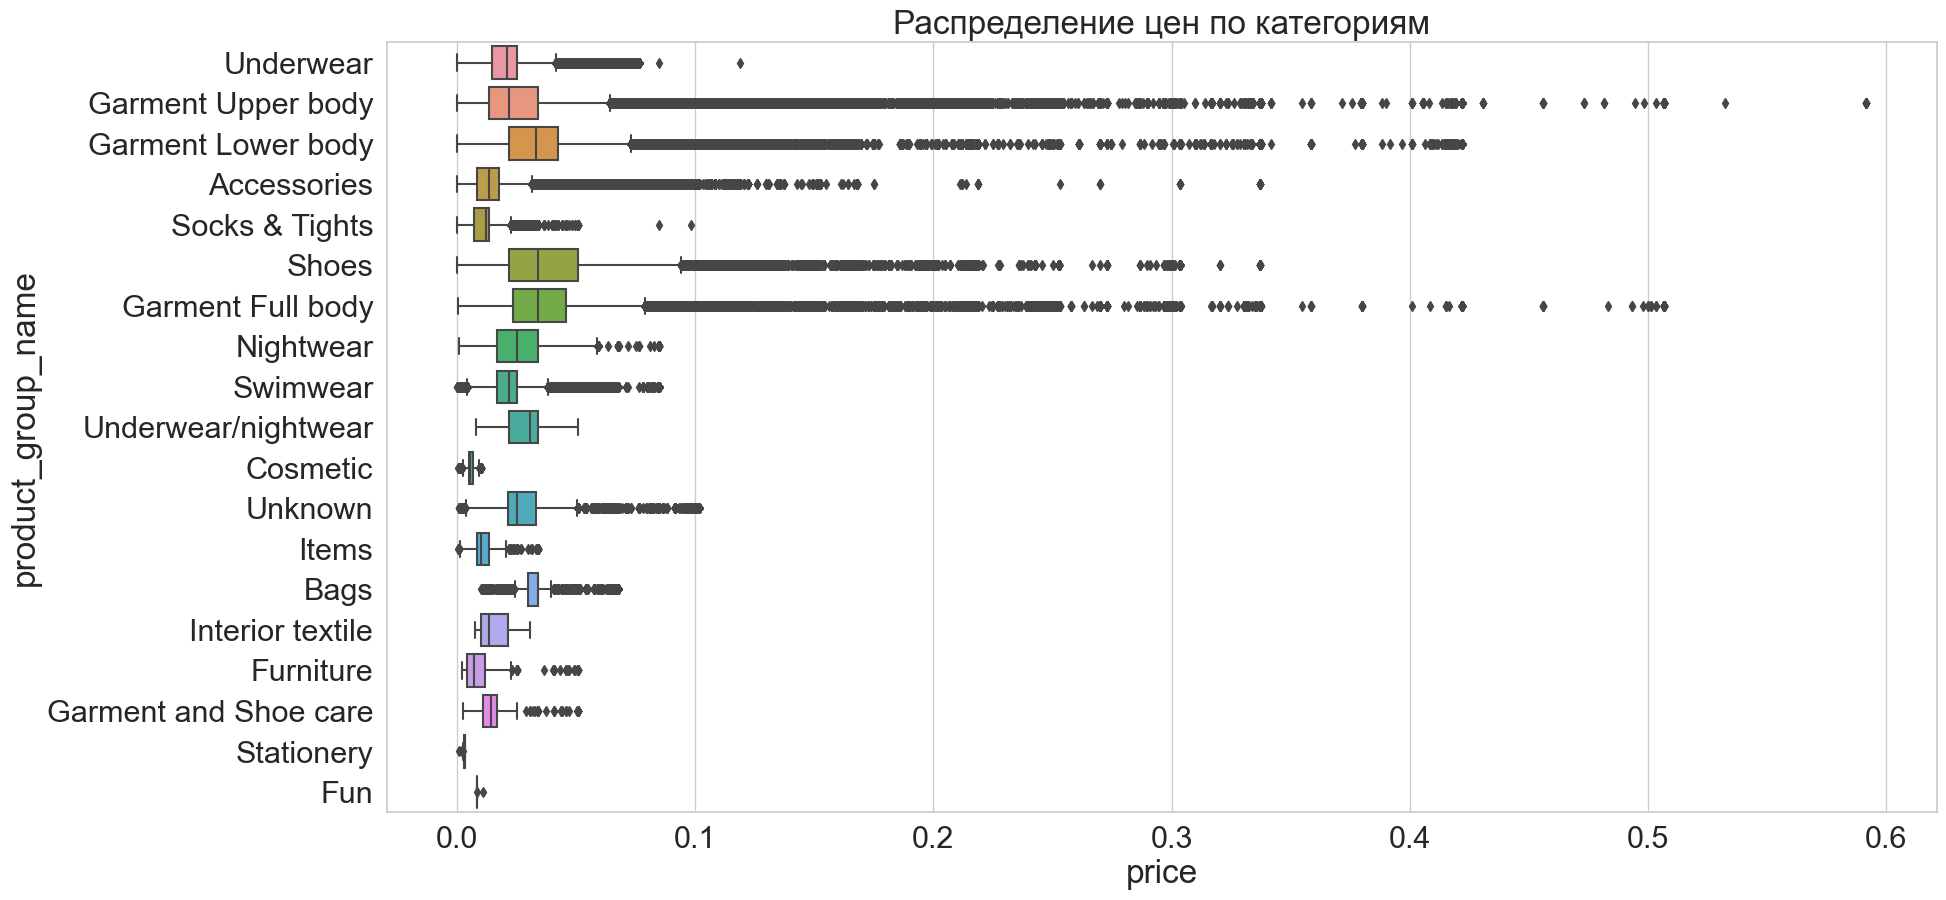

In [22]:
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
plt.title('Распределение цен по категориям', fontsize=24)
plt.show()

#### Выбросы для цен по категориям. Нижний/Верхний/Полный корпус имеют огромную разницу в цене. Я предполагаю, что это могут быть какие-то уникальные коллекции, по сравнению с повседневными. Некоторые изделия с высокой ценой даже относятся к группе аксессуаров.

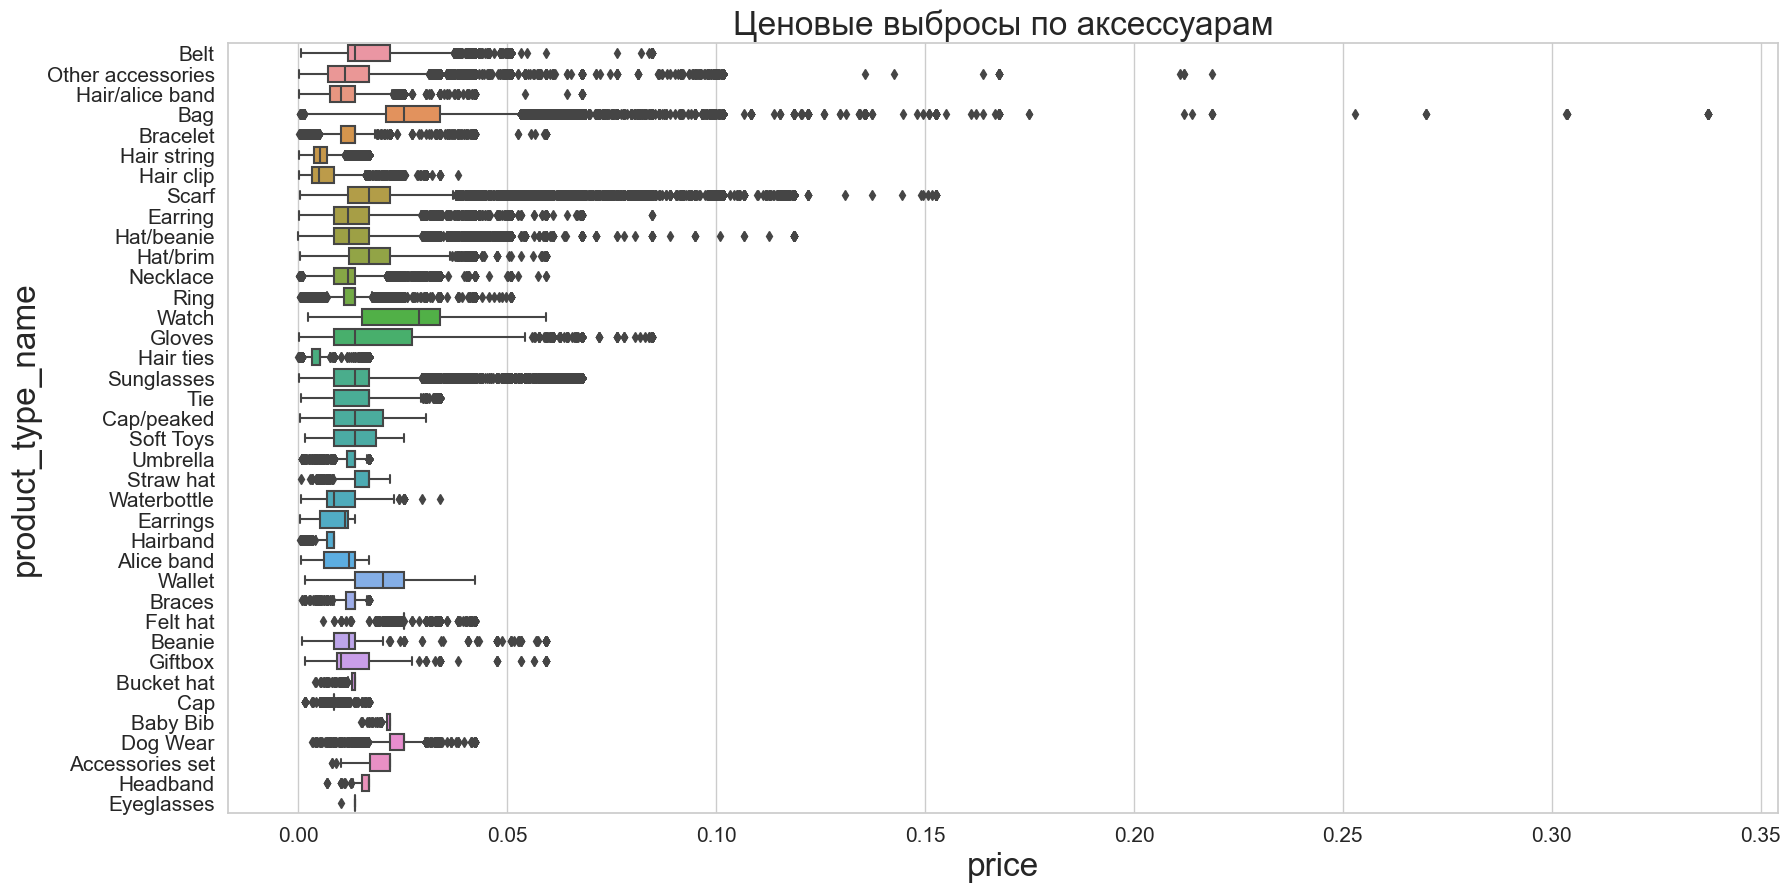

In [145]:
_ = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories']
ax = sns.boxplot(data=_, x='price', y='product_type_name')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.title('Ценовые выбросы по аксессуарам', fontsize=24) 

plt.show()

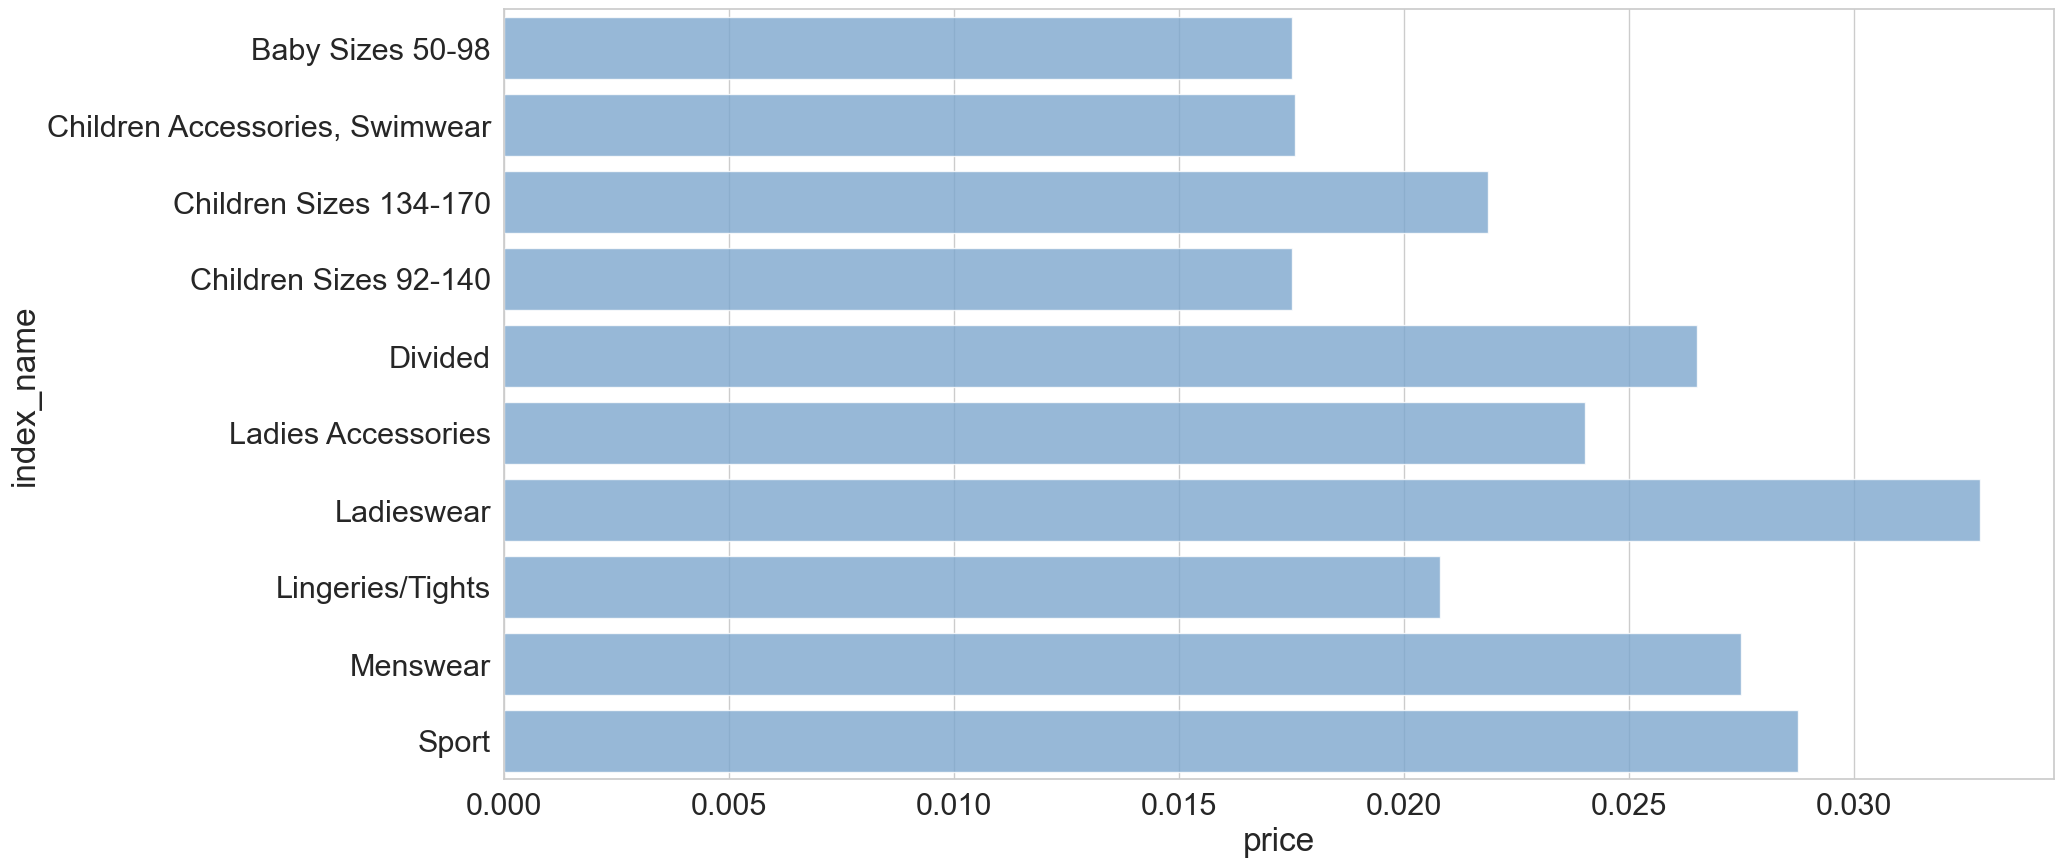

In [66]:
articles_index = articles_for_merge[['index_name', 'price']].groupby('index_name').mean()
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color=my_colors[1], alpha=0.8)

plt.show()


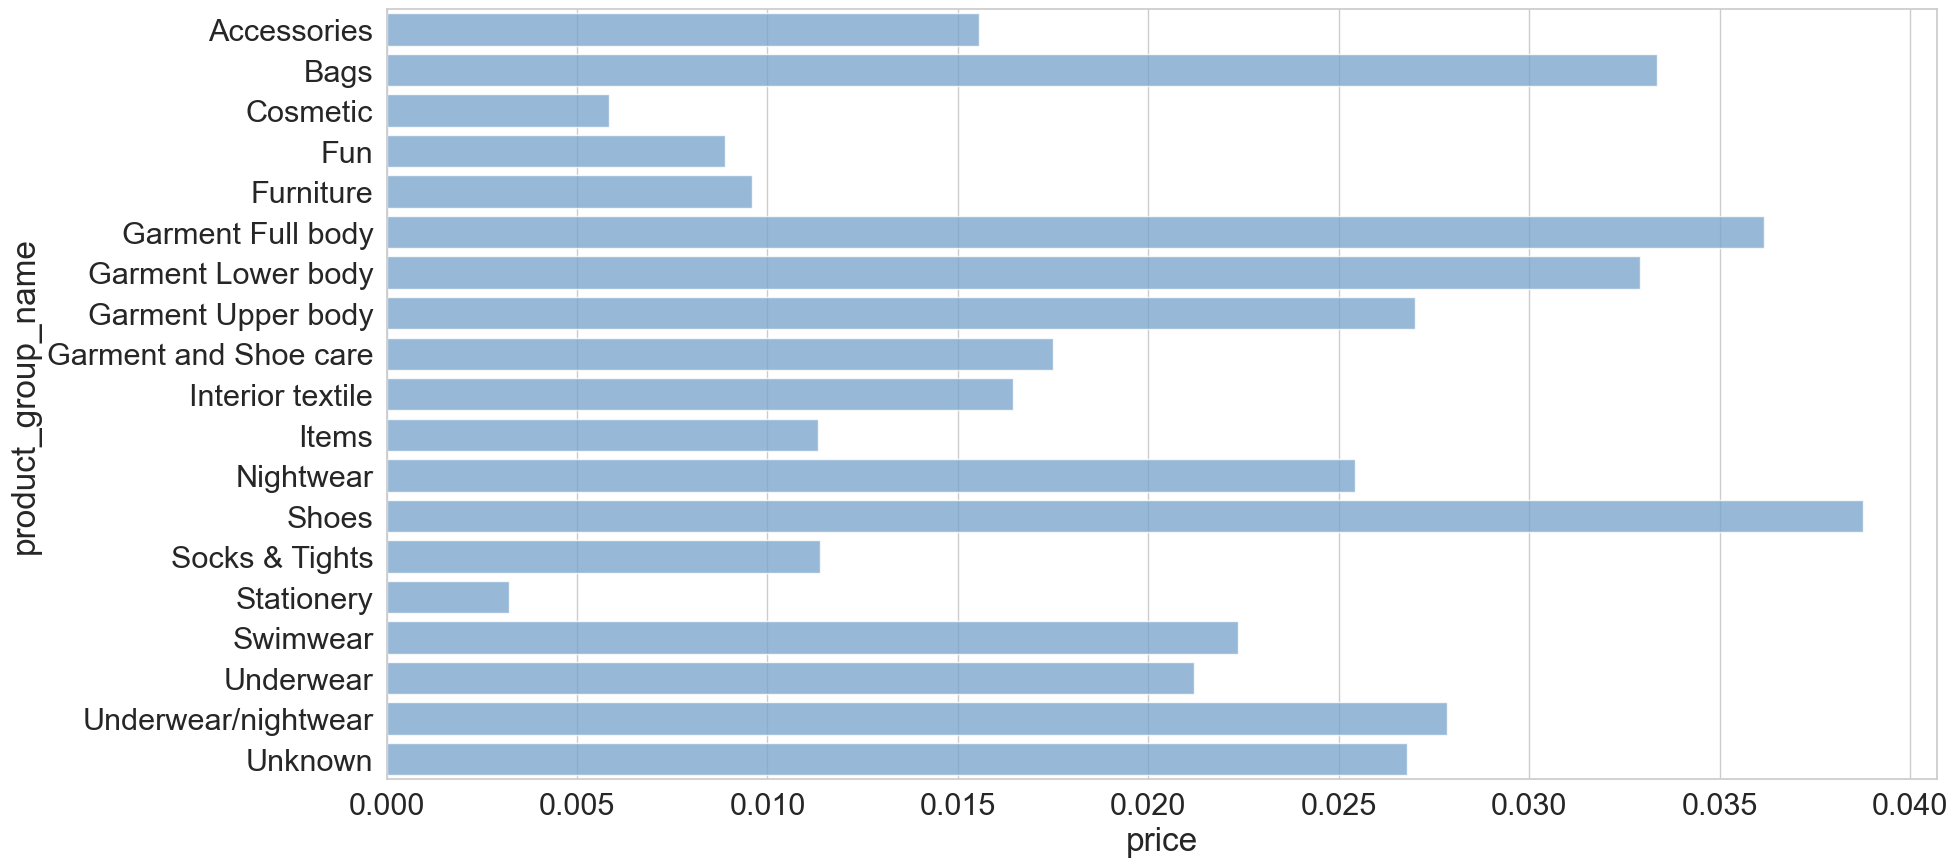

In [67]:
articles_index = articles_for_merge[['product_group_name', 'price']].groupby('product_group_name').mean()
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color=my_colors[1], alpha=0.8)
plt.show()

In [23]:
articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'])

In [15]:
print('Train:', 'Начало:', articles_for_merge['t_dat'].min(), 'Конец:', articles_for_merge['t_dat'].max())

Train: Начало: 2018-09-20 00:00:00 Конец: 2020-09-22 00:00:00


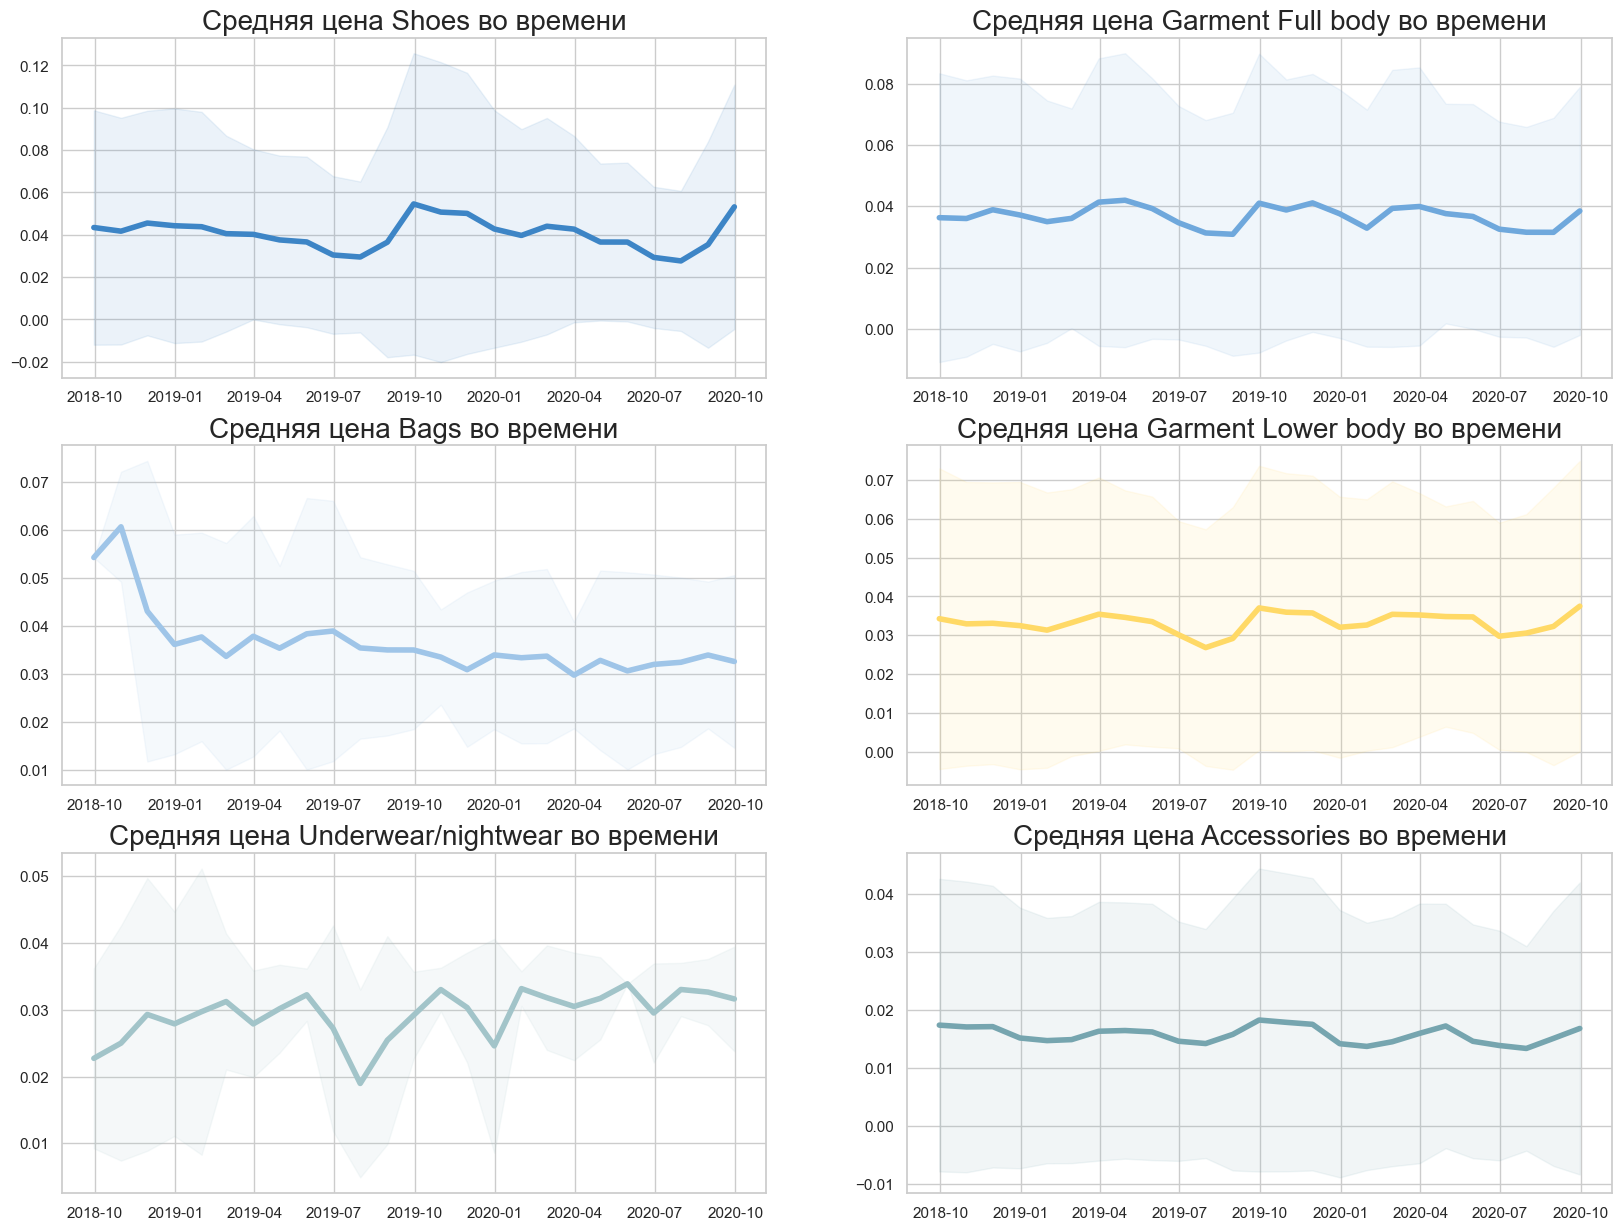

In [24]:

product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear','Accessories']
colors = my_colors
k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 15))


for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Средняя цена {product_list[k]} во времени', fontsize=20)
            
                      
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()


### Последние покупки по максимальной цене и по минимальной цене

In [68]:
max_price_ids = transactions[transactions.t_dat==transactions.t_dat.max()].sort_values('price', ascending=False) \
.iloc[:5][['article_id', 'price']]
min_price_ids = transactions[transactions.t_dat==transactions.t_dat.min()].sort_values('price', ascending=True) \
.iloc[:5][['article_id', 'price']]

#### Топ 5 с максимальной ценой:

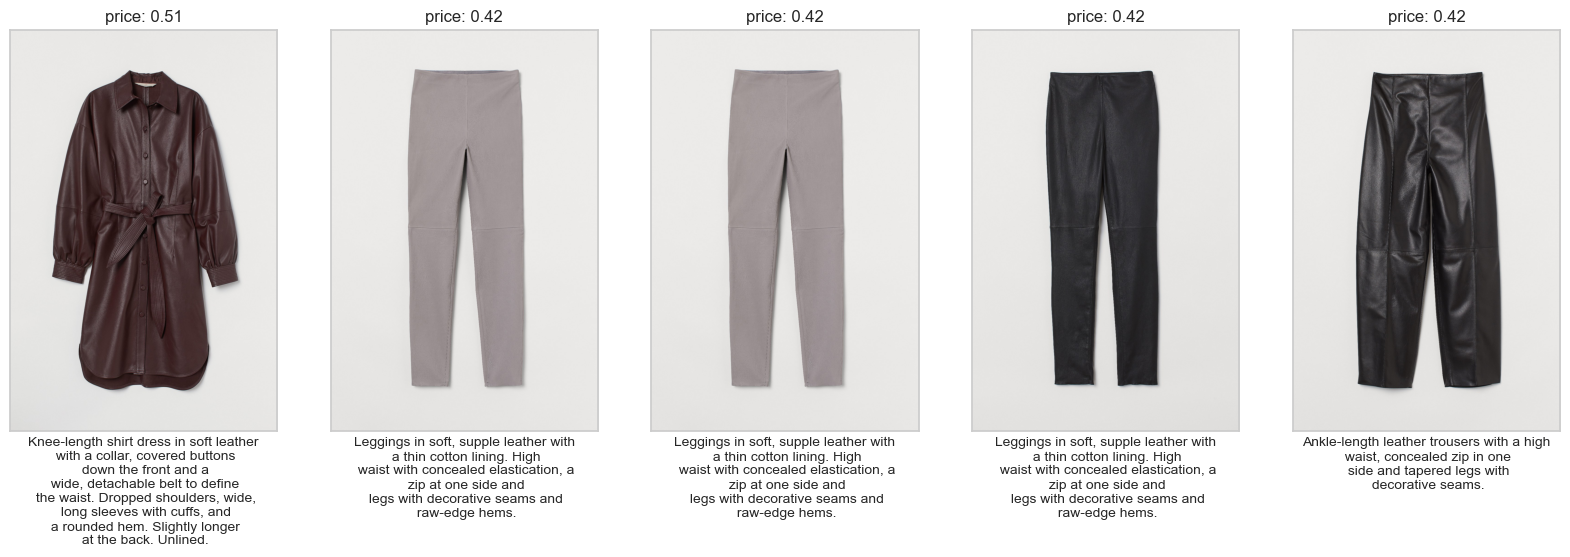

In [127]:
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in max_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 5 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'D:/Документы/Python/Kaggle/H&M Personalized Fashion Recommendations/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.2f}')
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    ax[i].set_xlabel(desc, fontsize=10)
    i += 1
plt.show()

#### Топ 5 с минимальной ценой:

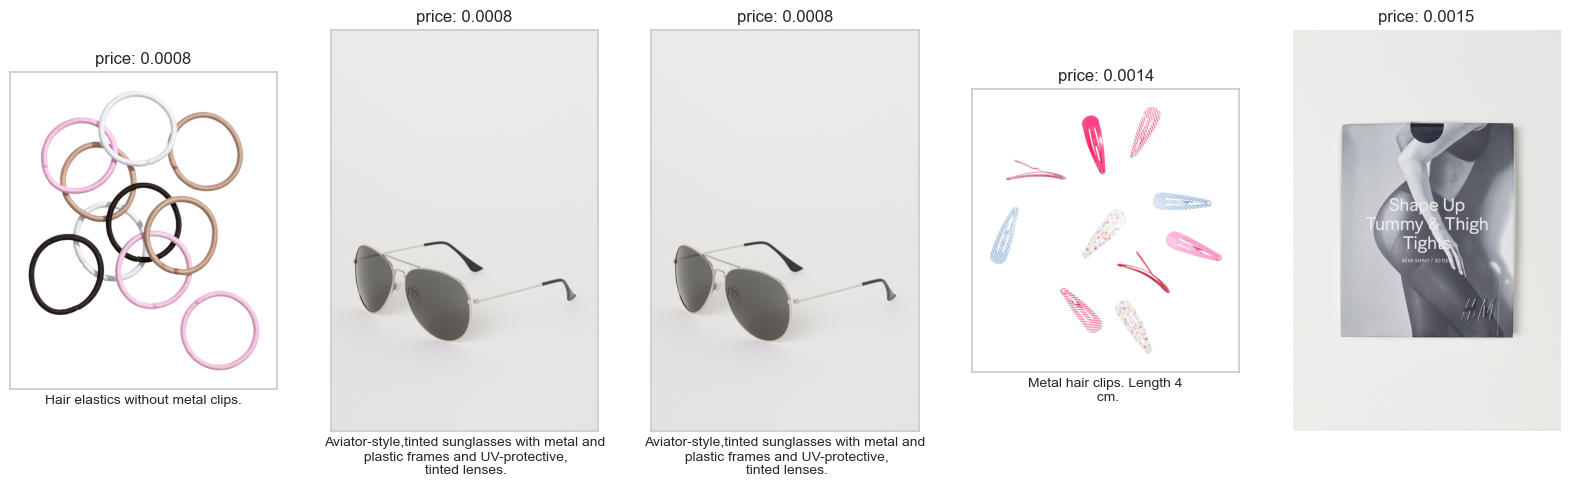

In [128]:
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in min_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'D:/Документы/Python/Kaggle/H&M Personalized Fashion Recommendations/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.4f}')
    ax[i].set_xlabel(desc, fontsize=10)
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    i += 1
plt.axis('off')
plt.show()